# Quantum algorithms



**Contents**

[Gates and Basis](#gates_basis)

[Quantum Teleportation](#teleportation)


### Imports

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import compile, execute
from qiskit import IBMQ, Aer

# Visualization tools
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram

# Plotting tools:
import matplotlib.pyplot as plt
%matplotlib inline

# Math variables:
from math import pi, sqrt

# Load account:
IBMQ.load_accounts() # make sure you have setup your token locally to use this

In [2]:
IBMQ.active_accounts()

[{'token': 'c6cca930edab1fea7c95e4714fe9b0424ebb0b2a841958df083ea61a187f93db2c62c40de91611ed39a0d011219e01ece59faea363aa75b75c3f5c307a6a995e',
  'url': 'https://q-console-api.mybluemix.net/api/Hubs/ibm-q-academic/Groups/univ-minho/Projects/group-1-test'},
 {'token': '2f9dfb2e287faa9a901d17c10597ed50cc524aa56531e01ff54cf232013ca6fae3db0e6c001ec03996a7d2a57923ce8d769172bbf6f216edcf708826a6f154d6',
  'url': 'https://quantumexperience.ng.bluemix.net/api'}]

### Check available backends

In [3]:
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

# see a list of available remote backends (these are freely given by IBM)
print("\nIBMQ Backends: ", IBMQ.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]

IBMQ Backends:  [<IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-academic, univ-minho, group-1-test)>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-academic, univ-minho, group-1-test)>, <IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


### Utils for executing circuits

In [12]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()


# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_sim, "\n\n", result_counts)
    
    if draw_circuit: # draw the circuit
        qc.draw()
    else: # or show the results
        show_results(result_counts)

## Gates and basis<a id='gates_basis'></a>

<img src="files/img/h_x_z.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">                                                                                                  

The above diagram is a useful shorthand for quantum states conversion using quantum gates, and it also depicts the consequences of reversible computation. Literally, you can have a qubit in any of the four states $|0\rangle$, $|1\rangle$, $|-\rangle$, $|+\rangle$  and obtain any other from it by performing simple one qubit gates.

### Exercise 1

**TASK:** Create a quantum circuit with 1 qubit and 1 bit.

In [24]:
q1 = QuantumRegister(1)
c1 = ClassicalRegister(1)
qc1= QuantumCircuit(q1,c1)

qc1.draw()

**TASK:** Prepare the state $e^{i\pi/2} | 1 \rangle$ and simulate its measurement.

In [25]:
qc1.h(q1)
#qc1.t(q1)
#qc1.measure(q1,c1)
qc1.draw()

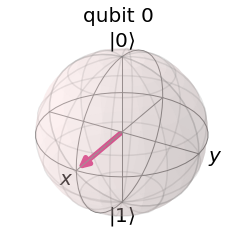

In [26]:
# Plot the Bloch sphere of the qubit state after performing the Hadamard gate
backend = Aer.get_backend('statevector_simulator')
result_h = execute(qc1, backend).result()
bloch_h= result_h.get_statevector(qc1)
plot_bloch_multivector(bloch_h)

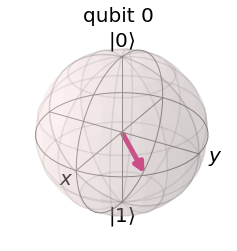

In [27]:
qc1.t(q1)

result_h = execute(qc1, backend).result()
bloch_h= result_h.get_statevector(qc1)
plot_bloch_multivector(bloch_h)

simulation: 

 Result(backend_name='qasm_simulator', backend_version='0.1.1', date=datetime.datetime(2019, 3, 26, 15, 36, 24, 870474), header=Obj(backend_name='qasm_simulator'), job_id='f9450750-8e40-4cee-89cb-5b99be8002b6', metadata={'omp_available_threads': 12, 'omp_circuit_threads': 1, 'omp_enabled': True, 'time_taken': 0.0014371}, qobj_id='f39347b7-d284-431d-9c20-ae527e68537e', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=504, 0x1=520)), header=Obj(clbit_labels=[['c4', 0]], compiled_circuit_qasm='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q4[1];\ncreg c4[1];\nh q4[0];\nt q4[0];\nmeasure q4[0] -> c4[0];\n', creg_sizes=[['c4', 1]], memory_slots=1, n_qubits=1, name='circuit6', qreg_sizes=[['q4', 1]], qubit_labels=[['q4', 0]]), metadata={'method': 'statevector', 'omp_shot_threads': 1, 'omp_state_threads': 12}, seed=1501026248, shots=1024, status='DONE', success=True, time_taken=0.0013913)], status='COMPLETED', success=True, time_taken=0.002063751220703125) 

 {'0'

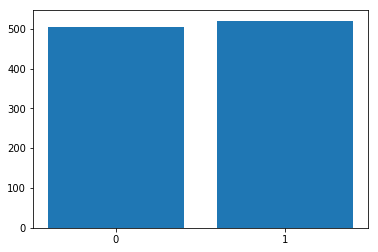

In [17]:
execute_locally(qc1)

**TASK:** Create a new quantum circuit. This time, prepare the state $\frac{1}{\sqrt(2)}(|0\rangle + |1\rangle)$ before applying the T gate. Apply the Hadamard gate and simulate measurements.

In [41]:
q2 = QuantumRegister(1)
c2 = ClassicalRegister(1)
qc2= QuantumCircuit(q2,c2)

qc2.draw()

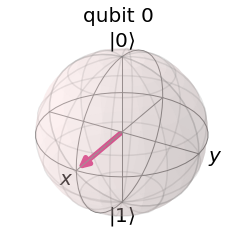

In [42]:
qc2.h(q2)
result_h = execute(qc2, backend).result()
bloch_h= result_h.get_statevector(qc2)
plot_bloch_multivector(bloch_h)

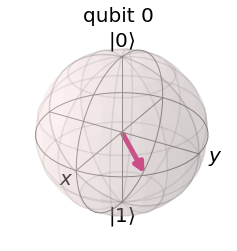

In [39]:
qc2.t(q2)
result_h = execute(qc2, backend).result()
bloch_h= result_h.get_statevector(qc2)
plot_bloch_multivector(bloch_h)

simulation: 

 Result(backend_name='qasm_simulator', backend_version='0.1.1', date=datetime.datetime(2019, 3, 26, 15, 45, 7, 889169), header=Obj(backend_name='qasm_simulator'), job_id='9bd15b5c-2e82-4bc0-85be-af94cdf0d6ae', metadata={'omp_available_threads': 12, 'omp_circuit_threads': 1, 'omp_enabled': True, 'time_taken': 0.0018807}, qobj_id='e587cd99-603a-44c3-a21c-de591fe25674', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=1024)), header=Obj(clbit_labels=[['c13', 0]], compiled_circuit_qasm='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q13[1];\ncreg c13[1];\nh q13[0];\nh q13[0];\nmeasure q13[0] -> c13[0];\n', creg_sizes=[['c13', 1]], memory_slots=1, n_qubits=1, name='circuit27', qreg_sizes=[['q13', 1]], qubit_labels=[['q13', 0]]), metadata={'method': 'stabilizer', 'omp_shot_threads': 1, 'omp_state_threads': 12}, seed=498776160, shots=1024, status='DONE', success=True, time_taken=0.0018058)], status='COMPLETED', success=True, time_taken=0.00199127197265625) 

 {'0':

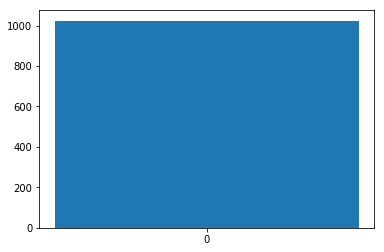

In [43]:

qc2.h(q2)
qc2.measure(q2,c2)

execute_locally(qc2)

**TASK:** What if we had not measured on the superposition basis? Change the circuit by removing the last Hadamard gate, and simulate measurements.

simulation: 

 Result(backend_name='qasm_simulator', backend_version='0.1.1', date=datetime.datetime(2019, 3, 26, 15, 42, 5, 533957), header=Obj(backend_name='qasm_simulator'), job_id='038b8386-daba-443d-919e-d312a0093427', metadata={'omp_available_threads': 12, 'omp_circuit_threads': 1, 'omp_enabled': True, 'time_taken': 0.0014101}, qobj_id='c05d1abd-3094-40ae-a83c-aea3a96eca3d', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=878, 0x1=146)), header=Obj(clbit_labels=[['c10', 0]], compiled_circuit_qasm='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q10[1];\ncreg c10[1];\nh q10[0];\nt q10[0];\nh q10[0];\nmeasure q10[0] -> c10[0];\nmeasure q10[0] -> c10[0];\n', creg_sizes=[['c10', 1]], memory_slots=1, n_qubits=1, name='circuit17', qreg_sizes=[['q10', 1]], qubit_labels=[['q10', 0]]), metadata={'method': 'statevector', 'omp_shot_threads': 1, 'omp_state_threads': 12}, seed=214413204, shots=1024, status='DONE', success=True, time_taken=0.0013633)], status='COMPLETED', success

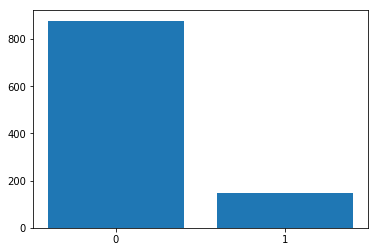

In [33]:
#qc2.measure(q2,c2)

execute_locally(qc2)


## Quantum Teleportation<a id='teleportation'></a>

Quantum teleportation is a protocol to transmit quantum states from one location to another, assisted by a previously shared entangled state and a classical communication channel. It was devised by Charles H. Bennett (IBM), Gilles Brassard, Claude Crépeau, Richard Jozsa, Asher Peres, and William K. Wootters in [1993](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1895). It was first demonstrated with photons in [1997](http://www.nature.com/nature/journal/v390/n6660/abs/390575a0.html), and has since been realised in [atoms](http://www.nature.com/nphys/journal/v9/n7/abs/nphys2631.html), [ions](http://www.nature.com/nature/journal/v429/n6993/full/nature02570.html), [electrons](http://science.sciencemag.org/content/345/6196/532) and [superconducting circuits](http://www.nature.com/nature/journal/v500/n7462/full/nature12422.html). The [record](http://www.nature.com/nature/journal/v489/n7415/full/nature11472.html) distance for quantum teleportation is 143 km via satellite, set in 2012.

<img src="files/img/teleportation.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">

As illustrated above, the protocol starts out with a shared entangled state between the sender (Alice) and the receiver (Bob):
$$|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)$$
The first qubit, denoted by subscript $A$, belongs to Alice, and the second qubit, $B$, belongs to Bob.

Alice has a quantum state that she wants to convey to Bob:
$$|\psi\rangle_{C} = \alpha|0\rangle_C + \beta|1\rangle_C$$

At this point, Alice has two quantum states ($C$, the one she wants to teleport, and $A$, one of the entangled pair), and Bob has one quantum state. The total state of the system is given by:
$$|\psi\rangle_{AB} \otimes |\psi\rangle_C = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B) \otimes (\alpha|0_C\rangle + \beta|1_C\rangle)$$


Alice now measures her two quantum states, $A$ and $C$, in the Bell basis. This will collapse the three state system into the one of the following four states with equal probability, with the corresponding measurement outcomes:
- **00**: $|\Phi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B)$
- **01**: $|\Phi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B)$
- **10**: $|\Psi^+\rangle_{AC}\otimes(\alpha|1\rangle_B + \beta|0\rangle_B)$ 
- **11**: $|\Psi^-\rangle_{AC}\otimes(-\alpha|1\rangle_B + \beta|0\rangle_B)$

Alice now sends the results of her measurements to Bob. Using this information, he performs one of the following transformations on his quantum state to transform it to the desired state $\alpha|0\rangle_B - \beta|1\rangle_B$:
- If he receives **00**, he applies $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
- If he receives **01**, he applies $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$
- If he receives **10**, he applies $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ 
- If he receives **11**, he applies $XZ = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$ 

Transmission (teleportation) of $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ is thus achieved. 

### Exercise 2

**TASK:** Create a 3-qubit quantum circuit. Prepare the entangled state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$ on qubits 1 and 2.

In [44]:
# Creating registers and circuit
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

teleport = QuantumCircuit(tq, tc0, tc1, tc2)

teleport.h(tq[1])
teleport.cx(tq[1],tq[2])

teleport.draw()



Alice then prepares her quantum state to be teleported, $|\psi\rangle_{C} = \alpha|0\rangle_C + \beta|1\rangle_C$. In this experiment, $\alpha = \cos(\frac{\theta}{2})$ and $\beta = \sin(\frac{\theta}{2})$ where $\theta = \frac{\pi}{4}$. This state can be created by applying a rotation around the y axis:
$R_y(\theta)$ on $q_C = q_0$

**TASK:** Apply $R_y(\pi/4)$ on $q_0$.

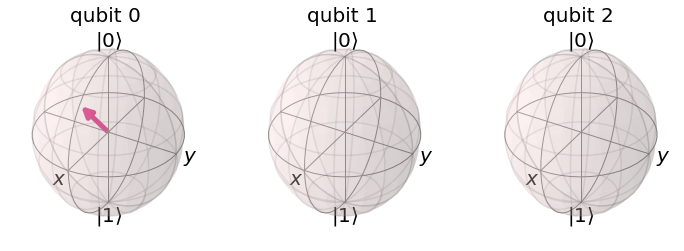

In [45]:
teleport.ry(pi/4, tq[0])

backend = Aer.get_backend('statevector_simulator')
result_h = execute(teleport, backend).result()
bloch_h= result_h.get_statevector(teleport)
plot_bloch_multivector(bloch_h)

**TASK:** Now, apply $CNOT$ to Alice's two quantum states $q_A(q_1)$ and $q_C(q_0)$, followed by an $H$, to entangle them and project them into the Bell basis. Next, apply measurement gates to $q_0$ and $q_1$.

In [46]:
teleport.cx(tq[0], tq[1])
teleport.h(tq[0])
teleport.barrier()

teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

In [47]:
teleport.draw()

Depending on the results of these measurements, Bob has to apply an $X$ or $Z$, or both, to his quantum state $q_B(q_2)$.

**TASK:** Apply the X and/or Z gates, controlled by the results of the measurements stored in _tc1_ and _tc2_. Measure $q_2$ into _tc2_ and draw the circuit.

In [48]:
teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

teleport.measure(tq[2], tc2[0])
teleport.draw()

We can now create the experiment and simulate the results:

In [49]:
local_backend = Aer.get_backend('qasm_simulator') # note that this circuit can not be run on an IBM Q device
teleport_job = execute(teleport, local_backend) 
teleport_result = teleport_job.result()

Let's first only plot the results of Alice's measurement. Note each classical register is seperated by a space, and the order is c2 c1 c0.

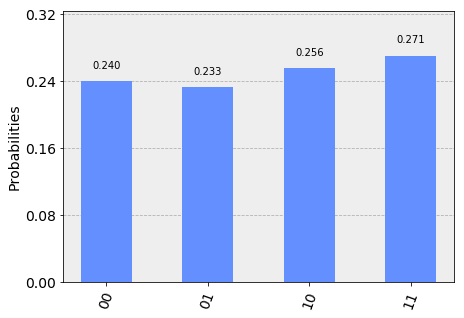

In [50]:
data = teleport_result.get_counts()
alice = {}
alice['00'] = data['0 0 0'] + data['1 0 0']
alice['10'] = data['0 1 0'] + data['1 1 0']
alice['01'] = data['0 0 1'] + data['1 0 1']
alice['11'] = data['0 1 1'] + data['1 1 1']
plot_histogram(alice)

As expected, the probabilities are roughly equal. However, if we plot plot the result of Bob's measurement:

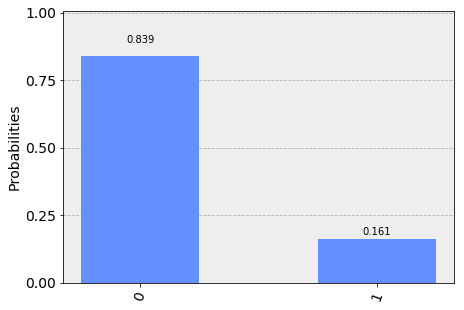

In [51]:
bob = {}
bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 1 0'] +  data['1 0 1'] + data['1 1 1']
plot_histogram(bob)

### Deutsch-Josza Algorithm

### Problem formulation

Consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an array of $n$  bits into either 0 or 1. We do not know the logic behind it. We know that it is either constant or balanced:
- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half the input value and 1 for the other half


For the case that $n=1$ we have $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit into either 0 or 1. If we are given a black box, an **oracle**, that takes as input this two bits and outputs the unknown value.

<img src="files/img/c_oracle.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

To answer this question classically, we would always need two function invocations. We could do $f(0)$ and $f(1)$ and see if it is either constant or balanced. 

Before transforming it into a quantum problem, we need our black box to be an oracle which allows for **reversible computation**, like so:

<img src="files/img/q_oracle.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">


### Algorithm


Let us imagine the following procedure:
- We begin with two qubits, q0 in state $|0\rangle$ and q1 in state $|1\rangle$ ($|01\rangle$).
- We apply a Hadamard to each qubit, the result is $\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$
- We now call our oracle, which maps $|ab\rangle$ or $|a\rangle |b\rangle$ (easier to interpret) into $|a\rangle |b \oplus f(a)\rangle$ the result is:

$$\frac{1}{2}( \; |0\rangle |0\oplus f(0)\rangle - |0\rangle |1\oplus f(0)\rangle + |1\rangle |0\oplus f(1)\rangle - |1 \rangle |1\oplus f(1)\rangle \;)$$

We can now use the following equivalence:

$$|0 \oplus a\rangle - |1 \oplus a\rangle =  (-1)^a(|0\rangle - |1\rangle)$$

To replace above and get:

$$\frac{1}{2}(|0\rangle \; [(-1)^{f(0)}(|0\rangle - |1\rangle)]\; +\; |1\rangle \;[(-1)^{f(1)}(|0\rangle - |1\rangle)])$$

This quantum state can be separated into the product state:

$$ [\frac{1}{\sqrt{2}} (-1)^{f(0)} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(1)}| 1 \rangle] \otimes [\frac{1}{\sqrt{2}} | 0 \rangle - \frac{1}{\sqrt{2}} | 1 \rangle] $$

Our second qubit : $(\frac{1}{\sqrt{2}} | 0 \rangle - \frac{1}{\sqrt{2}} | 1 \rangle)$ can be ignored, and what remains is our first qubit: $(\frac{1}{\sqrt{2}} (-1)^{f(0)} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(1)}| 1 \rangle)$ which contains both $f(0)$ and $f(1)$! both images of $f$ with a single pass over the oracle. This can further be simplified as:

$$(-1)^{f(0)}(\frac{1}{\sqrt{2}} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(0) \oplus f(1)} | 1 \rangle)$$


Lastly, we apply a Hadamard gate on our qubit and we arrive at:

$$(-1)^{f(0)} |f(0) \oplus f(1)\rangle$$

What is the meaning of this?
- if f is constant ($00$ or $11$) $\rightarrow$ output is $0$ (xor is 0)
- if f is balanced ($01$ or $10$) $\rightarrow$ output is $\pm 1$ (xor is 1)

Which, in fact, means that we can do a *single pass* over the oracle gate discover whether it is constant or balanced, an impossible feat in classical computing. 

Generalizing for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, a classical algorithm would need $2^{n-1}+1$ passes. While a quantum function would still require 1 pass.

<img src="files/img/q_oraclen.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="center">

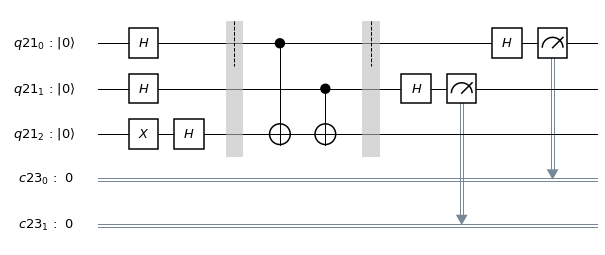

In [61]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Flip ancilla qubit to |1>
qc.x(qr[2])

# Apply Hadamard gate to the whole register
qc.h(qr)
qc.barrier()

# Oracle
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()

# Return qubits to the computational basis
qc.h(qr[0])
qc.h(qr[1])

# Measure
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw(output='mpl')

In [1]:
execute_locally(qc)

NameError: name 'execute_locally' is not defined